In [1]:
import pandas as pd # Import for Pandas
import numpy as np # Import for Numpy
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.graph_objs as go

In [2]:
df1 = pd.read_json("StreamingHistory0.json") # Read the first file
listening_history = df1.copy()

In [3]:
listening_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12128 entries, 0 to 12127
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   endTime     12128 non-null  object
 1   artistName  12128 non-null  object
 2   trackName   12128 non-null  object
 3   msPlayed    12128 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 379.1+ KB


In [4]:
listening_history.nunique() # To see the unique elemetns present in each column

endTime       9536
artistName     438
trackName     1163
msPlayed      7876
dtype: int64

In [5]:
listening_history["Play-Time"]= pd.to_datetime(listening_history["endTime"]) # To create a additional column
listening_history['year'] = pd.DatetimeIndex(listening_history["Play-Time"]).year
listening_history['month'] = pd.DatetimeIndex(listening_history["Play-Time"]).month
listening_history['day'] = pd.DatetimeIndex(listening_history["Play-Time"]).day
listening_history['weekday'] = pd.DatetimeIndex(listening_history["Play-Time"]).weekday
listening_history['time'] = pd.DatetimeIndex(listening_history["Play-Time"]).time
listening_history['hours'] = pd.DatetimeIndex(listening_history["Play-Time"]).hour
listening_history['day-name'] = listening_history["Play-Time"].apply(lambda x: x.day_name())
listening_history['Count'] = 1 

In [6]:
listening_history["Time-Played (hh-mm-ss)"] = pd.to_timedelta(listening_history["msPlayed"], unit='ms')

In [7]:
def hours(td):
    '''To get the hour information'''
    return td.seconds/3600

def minutes(td):
    '''To get the minutes information'''
    return (td.seconds/60)%60

listening_history["Listening Time(Hours)"] = listening_history["Time-Played (hh-mm-ss)"].apply(hours).round(3)
listening_history["Listening Time(Minutes)"] = listening_history["Time-Played (hh-mm-ss)"].apply(minutes).round(3)

In [8]:
listening_history.drop(columns=["endTime","Time-Played (hh-mm-ss)","msPlayed"], inplace=True)

# Exploratory Analysis and Visualization

In [9]:
unique_artists = listening_history["artistName"].nunique()
total_artists = listening_history["artistName"].count() 
unique_artist_percentage = unique_artists/total_artists*100

In [10]:
top_10_artist_df = listening_history.groupby(["artistName"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Listening Time(Minutes)",ascending=False)
top_10_artist_df.head(15)

,Listening Time(Hours),Listening Time(Minutes),Count
artistName,,,
Ed Sheeran,38.386,2303.272,982
Linkin Park,36.458,2188.220,942
The Local Train,22.690,1358.712,519
Pritam,20.699,1242.077,483
Coldplay,20.494,1230.125,482
5 Seconds of Summer,16.280,975.332,479
One Direction,15.043,902.564,368
The Chainsmokers,14.595,876.894,453
Shawn Mendes,14.530,872.647,419


## Percentage of unique artist we have.

In [12]:
non_unique_artists = total_artists - unique_artists

unique_artist_list = np.array([unique_artists, non_unique_artists])
unique_artist_list_labels = ["Unique Artists", "Non-Unique Artists"]

fig = go.Figure(data=[go.Pie(labels=unique_artist_list_labels,
                             values=unique_artist_list,
                             textinfo='label+percent',
                             hole=0.3,
                             pull=[0.2, 0],
                             marker=dict(colors=['royalblue', 'lightblue'],
                                         line=dict(color='#000000')),
                             hoverinfo='label+value+percent')])

fig.update_layout(title="Unique Artist Percentage", width=600, height=400)
fig.show()

<h3> Inference </h3>
The data indicates that out of all the artists Mukul listens to, the unique one is accounting for just 3.61% of  <br>the total number of artists. The remaining 96.4% of the artists are non-unique and have been listened to multiple times.

In [13]:
top_10_artist_df = listening_history.groupby(["artistName"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Listening Time(Minutes)",ascending=False)
top_10_artist_time_df = listening_history.groupby(["artistName"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Listening Time(Minutes)",ascending=False)
top_10_artist_count_df = listening_history.groupby(["artistName"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Count",ascending=False)

In [18]:
import plotly.graph_objs as go

fig1 = go.Figure()
fig1.add_trace(go.Bar(x=top_10_artist_time_df.head(10).index, y=top_10_artist_time_df["Listening Time(Hours)"].head(10), marker_color='green', name = 'hours'))
fig1.update_layout(title="My Top 10 Favourite Artist (based on Hours)", xaxis_title="Artists", yaxis_title="No. of Hours Songs Played", xaxis_tickangle=-75)
fig1.add_shape(type="line", x0=0, y0=top_10_artist_time_df["Listening Time(Hours)"][:100].mean(), x1=1, y1=top_10_artist_time_df["Listening Time(Hours)"][:100].mean(), line=dict(dash="dash", color="black"))

fig2 = go.Figure()
fig2.add_trace(go.Bar(x=top_10_artist_count_df.head(10).index, y=top_10_artist_count_df["Count"].head(10), marker_color='orange', name='count'))
fig2.update_layout(title="My Top 10 Favourite Artist (based on Counts)", xaxis_title="Artists", yaxis_title="No. of Times Songs Played", xaxis_tickangle=-75)
fig2.add_shape(type="line", x0=0, y0=top_10_artist_count_df["Count"][:100].mean(), x1=1, y1=top_10_artist_count_df["Count"][:100].mean(), line=dict(dash="dash", color="black"))

from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2)

fig.add_trace(fig1['data'][0], row=1, col=1)
fig.add_trace(fig2['data'][0], row=1, col=2)

fig.update_layout(title="My Top 10 Favourite Artists", height=800)

fig.show()

<h3> Inference </h3>
here the green chart  corresponds to top 10 favourite artists based on the number of hours 
<br>
and the orange chart  corresponds to top 10 favourite artists based on the counts
<br>
<br>
both suggest Ed-sheeran as the favourite most artist for Mukul

In [19]:
unique_songs = listening_history["trackName"].nunique()
total_songs = listening_history["trackName"].count()
unique_songs_percentage = unique_songs/total_songs*100
unique_songs_percentage

9.589379947229551

In [20]:
import plotly.graph_objs as go

unique_songs_list = np.array([unique_songs, total_songs-unique_songs])
unique_songs_list_labels = [" Unique Songs", "Non Unique Songs"]

fig = go.Figure(data=[go.Pie(labels=unique_songs_list_labels, values=unique_songs_list, 
                             hole=.3, pull=[0.05, 0.05])])

fig.update_layout(title="Unique Songs Percentage", title_x=0.5, width=600)

fig.show()

<h3> Inference </h3>
The unique songs percentage is 9.59% and non-unique songs comprise of 90.4%

In [21]:
top_10_songs_time_df = listening_history.groupby(["trackName"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Listening Time(Minutes)",ascending=False)
top_10_songs_count_df = listening_history.groupby(["trackName"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Count",ascending=False)

In [22]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Setting up the subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=("No. of Hours Songs Played", "No. of Times Songs Played"))

# Adding the traces to the subplots
fig.add_trace(go.Bar(x=top_10_songs_time_df.head(10).index, y=top_10_songs_time_df["Listening Time(Hours)"].head(10), marker_color='blue',name = 'hours'), row=1, col=1)
fig.add_hline(y=top_10_songs_time_df["Listening Time(Hours)"][:100].mean(), line_dash='dash', line_color='red', row=1, col=1)
fig.add_trace(go.Bar(x=top_10_songs_count_df.head(10).index, y=top_10_songs_count_df["Count"].head(10), marker_color='red', name='count'), row=1, col=2)
fig.add_hline(y=top_10_songs_count_df["Count"][:100].mean(), line_dash='dash', line_color='blue', row=1, col=2)

# Updating the layout of the subplots
fig.update_layout(title="My Top 10 Favourite Songs", height=800)

# Displaying the subplots
fig.show()

<h3> Inference </h3>
here the blue chart corresponds to top 10 favourite songs based on the number of hours 
<br>
and the red chart corresponds to top 10 favourite songs based on the counts
<br>
<br>
both suggest 'Choo Lo' as the favourite most song of Mukul

In [23]:
import plotly.express as px

fig = px.pie(listening_history["day-name"].value_counts(), values=listening_history["day-name"].value_counts().values, names=listening_history["day-name"].value_counts().index, title="Day wise % of Spotify Streaming", width=600)
fig.show()

<h3> Inference </h3>
This pie chart suggest an equi-percentage distribution of using spotify on each day of the week, With Tuesday taking <br>out the maximum percentage, but overall they are all equal

<Axes: title={'center': 'Average Distribution of Streaming Over Day Hours'}, xlabel='Hours (in 24 hour format)', ylabel='Songs Played'>

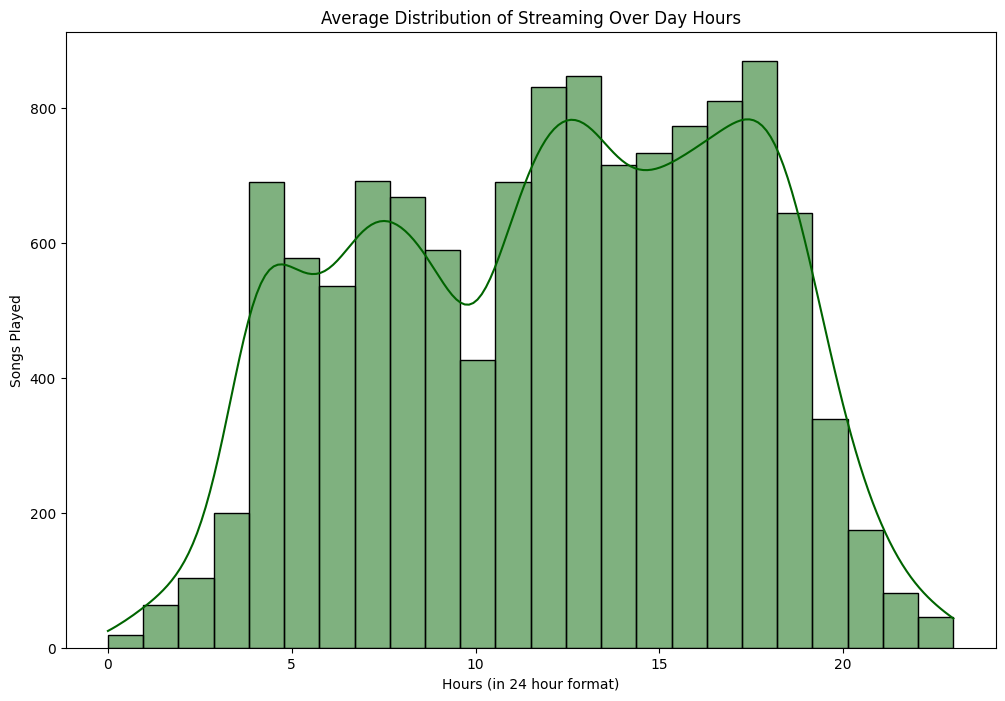

In [24]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set(title="Average Distribution of Streaming Over Day Hours",xlabel="Hours (in 24 hour format)", ylabel="Songs Played")
sns.histplot(listening_history["hours"], bins=24,kde=True, color="darkgreen")

<h3> Inference </h3>
With this histogram graph we can see about my average usage:<br>
Maximum around 1 PM and 6 PM hour mark <br>
Minimum around 12-1 AM hour mark

In [25]:
import plotly.express as px

# Define a dictionary to map month numbers to month names
month_names = {1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June",
               7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"}

# Map the month numbers to their names in the DataFrame
listening_history["month_name"] = listening_history["month"].map(month_names)

# Define a list of colors for each month
colors = ["#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00",
          "#CC79A7", "#999999", "#663300", "#CCFF00", "#FF6600", "#9900FF",
          "#00CCFF", "#FF9900", "#33FF00", "#FF33CC", "#CCFF33", "#66CCFF",
          "#FFCC66", "#33FFFF", "#CC66FF", "#CCFFCC", "#FF9999", "#CCFF99"]

# Set the order of categories in the y-axis
category_order = [month_names[i] for i in range(1, 13)]

fig = px.histogram(listening_history, y="month_name", nbins=12, height=600, width=1200,
                   labels={"month_name": "Months", "count": "Songs Played in Counts"},
                   title="Average Spotify Usage over Years",
                   color_discrete_sequence=colors, category_orders={"month_name": category_order})

fig.show()


<h3> Inference </h3>
It shows July as the month with most usage and april as the least (since we have our endsems during that time :)

In [26]:
time_spent_hours = listening_history["Listening Time(Hours)"].sum() # Summation of all 
date_df = listening_history["Play-Time"] # Making a new dataset of time only
time_difference = (date_df.iloc[-1] - date_df.iloc[0]) / np.timedelta64(1,"D") # Calulating total possible days in days
time_difference_hours = time_difference*24 # Converting that in hours by multiplying with 24

In [27]:
time_spent_percentage = time_spent_hours/time_difference_hours*100

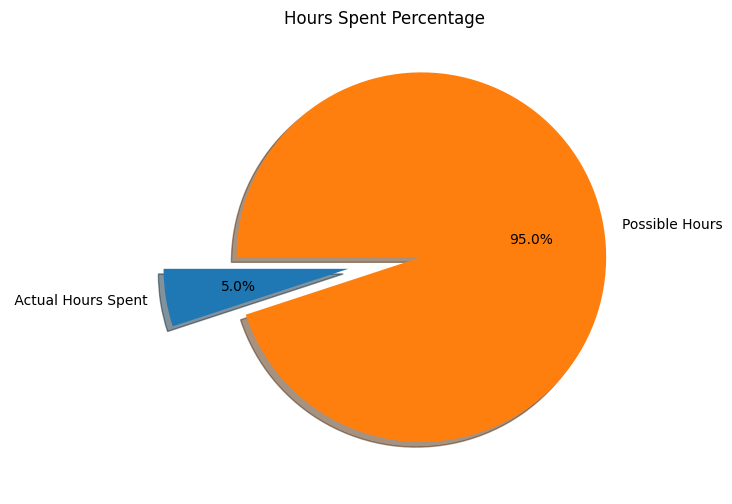

In [28]:
hours_spent_list = np.array([time_spent_hours, time_difference_hours-time_spent_hours])
hours_spent_list_labels = [" Actual Hours Spent", "Possible Hours"]

fig, ax = plt.subplots(figsize=(12,6))
ax.pie(hours_spent_list, labels= hours_spent_list_labels, autopct='%1.1f%%',  explode=[0.2,0.2], startangle=180, shadow = True);
plt.title("Hours Spent Percentage");

In [29]:
total_songs = listening_history["trackName"].count() # Total Songs played
average_songs_played_daily = (total_songs / time_difference).round()

In [30]:
listening_history["date"] = listening_history["Play-Time"].dt.date # Creating a new column with date

In [31]:
most_songs = listening_history.groupby(["date"])[["Count"]].sum().sort_values(by="Count", ascending=False)

In [32]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=most_songs.index, 
                         y=most_songs["Count"],
                         mode='markers'))

fig.add_shape(type="line",
              x0=most_songs.index.min(),
              y0=most_songs["Count"].mean(),
              x1=most_songs.index.max(),
              y1=most_songs["Count"].mean(),
              line=dict(color="red", width=2, dash="dash"))

fig.update_layout(title="Maximum number of songs played in a day",
                  xaxis_title="Date",
                  yaxis_title="Count",
                  width=1200,
                  height=600)

fig.show()

<h3> Inference </h3>
This shows that I played most number of songs i.e. 161 on 16th June 2022

In [33]:
fav_artist = listening_history.groupby(["artistName"])["Count"].count()

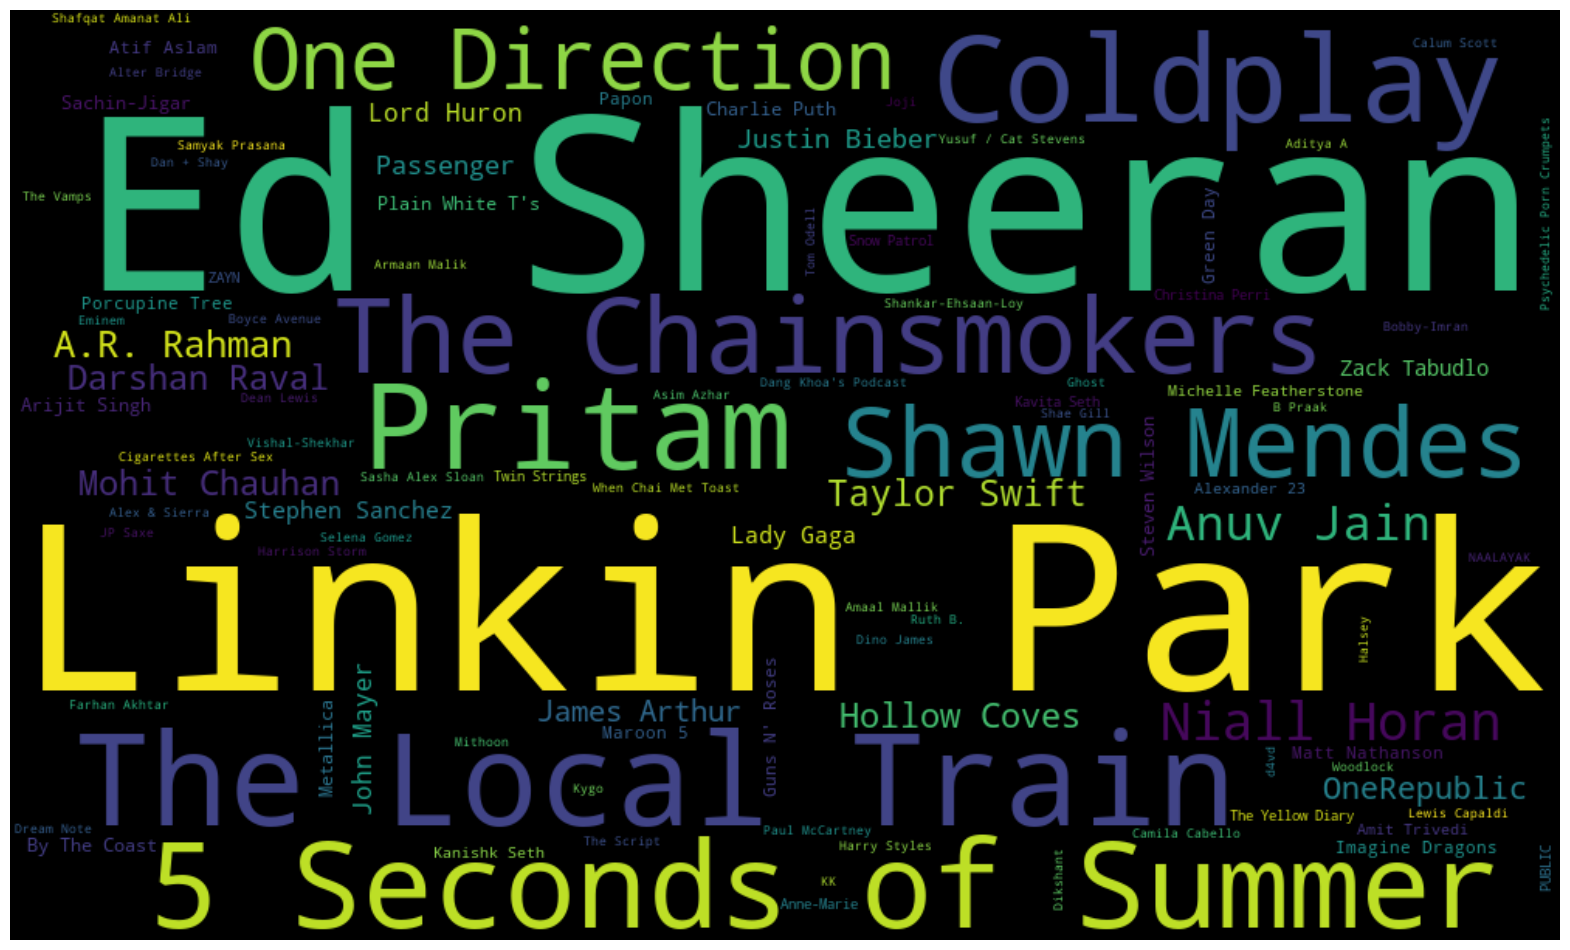

In [34]:
from wordcloud import WordCloud
fig, ax = plt.subplots(figsize=(20,15))
wordcloud = WordCloud(width=1000,height=600, max_words=100,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(fav_artist)
ax.imshow(wordcloud, interpolation='bilinear')
plt.axis(False);

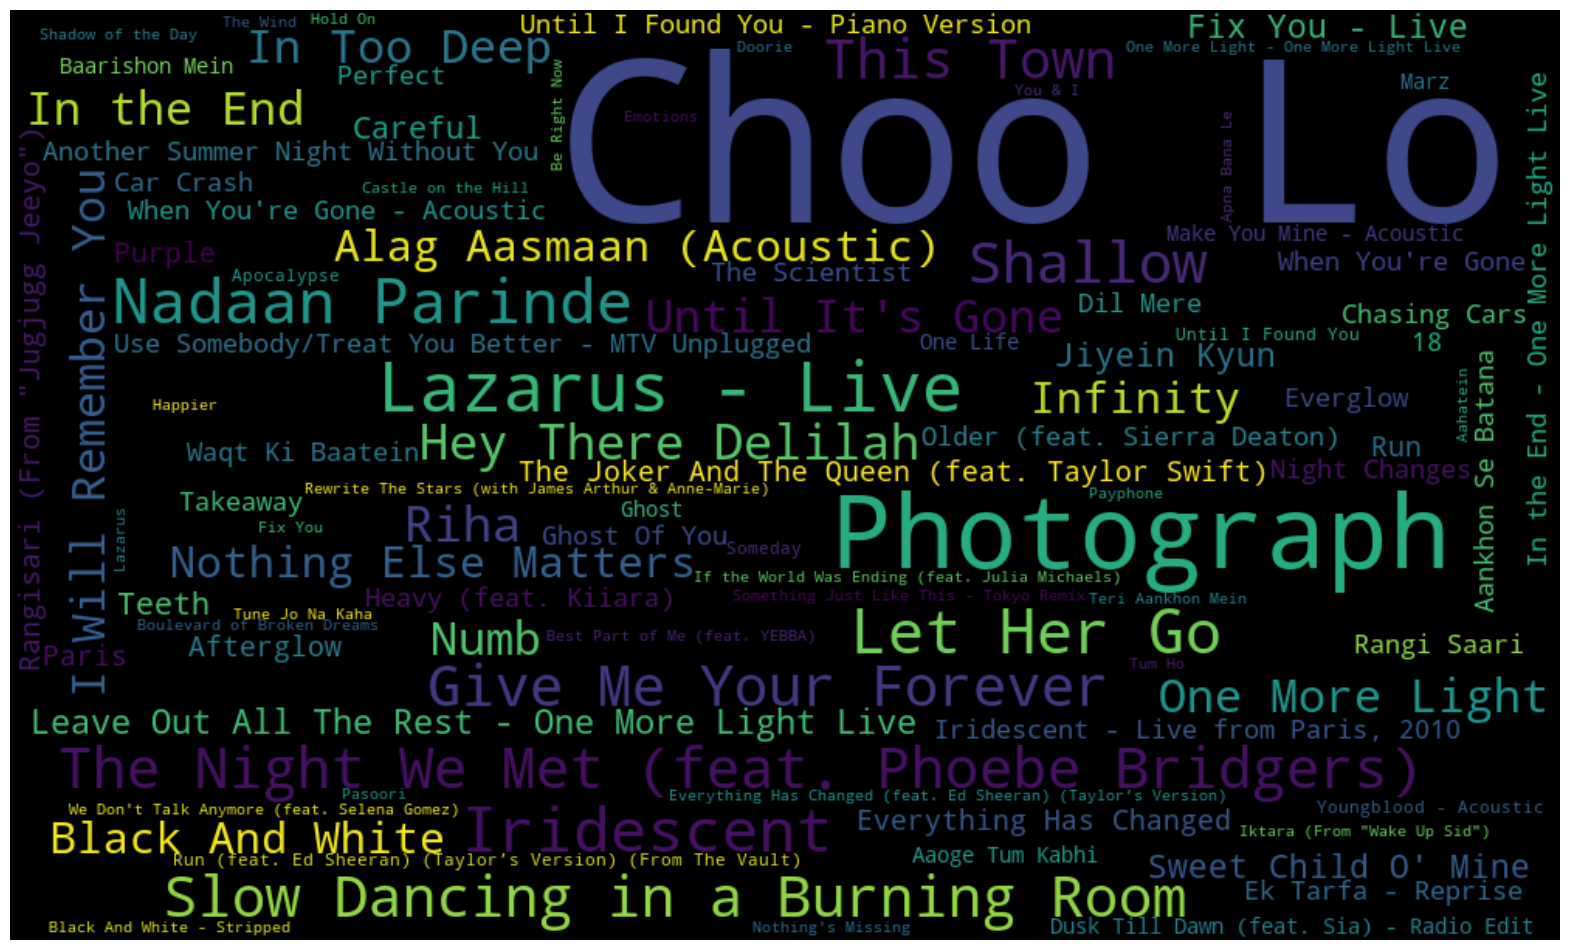

In [49]:
fav_songs = listening_history.groupby(["trackName"])["Count"].count()
fig, ax = plt.subplots(figsize=(20,15))
wordcloud = WordCloud(width=1000,height=600, max_words=100,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(fav_songs)
ax.imshow(wordcloud, interpolation='bilinear')
plt.axis(False);

In [41]:
active_usage = listening_history.groupby(['hours', 'day-name'])['artistName'].size().reset_index()
active_usage = active_usage.set_index(['hours', 'day-name'])
active_usage_pivot = active_usage.unstack(level='day-name')

[Text(0.5, 1.0, 'Heat Map of Spotify Usage'),
 Text(0.5, 102.72222222222219, 'Days of the Week'),
 Text(158.22222222222223, 0.5, 'Time (in 24 hrs format)')]

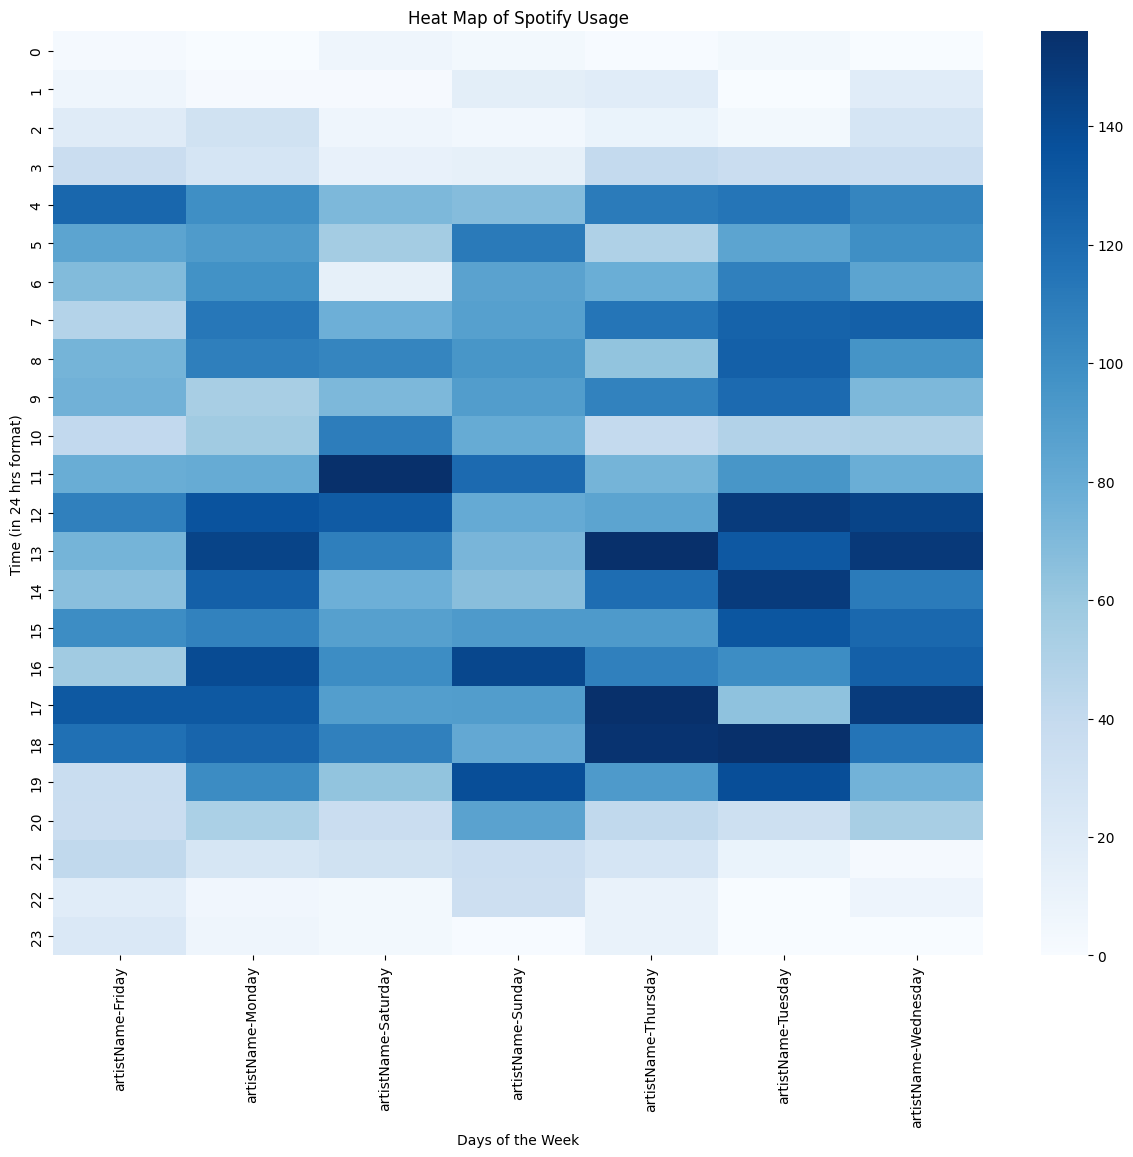

In [43]:
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
active_usage = listening_history.groupby(['hours', 'day-name'])['artistName'].size().reset_index()
active_usage = active_usage.set_index(['hours', 'day-name'])
active_usage = active_usage.reindex(pd.MultiIndex.from_product([range(24), days], names=['hours', 'day-name']))
active_usage_pivot = active_usage.unstack(level='day-name')

fig, ax = plt.subplots(figsize=(15,12))
ax = sns.heatmap(active_usage_pivot.fillna(0), robust=True, cmap="Blues", ax = ax)
ax.set(title="Heat Map of Spotify Usage", xlabel="Days of the Week",ylabel="Time (in 24 hrs format)")


[Text(0.5, 1.0, 'Average Spotify Usage over Week'),
 Text(0.5, 0, 'Days of the Week'),
 Text(0, 0.5, 'Counts of Songs Played')]

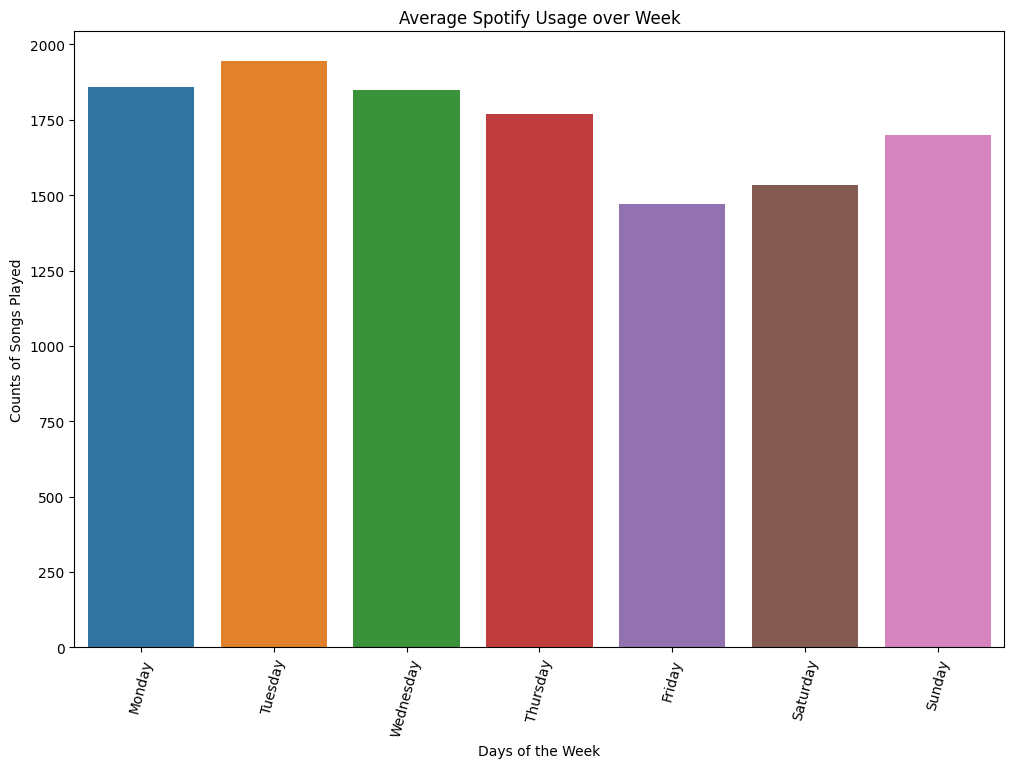

In [48]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(x=listening_history["day-name"], order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], ax=ax)
plt.xticks(rotation=75)
ax.set(title="Average Spotify Usage over Week", xlabel="Days of the Week", ylabel="Counts of Songs Played")


In [45]:
extra_df = listening_history.copy()
extra_df['is_weekend'] = extra_df["day-name"].isin(['Sunday','Saturday'])
weekday_vs_weekend = extra_df.groupby(['is_weekend'])[['Count']].sum()

In [46]:
weekday_vs_weekend["Percentage"] = weekday_vs_weekend["Count"]/weekday_vs_weekend["Count"].sum()*100

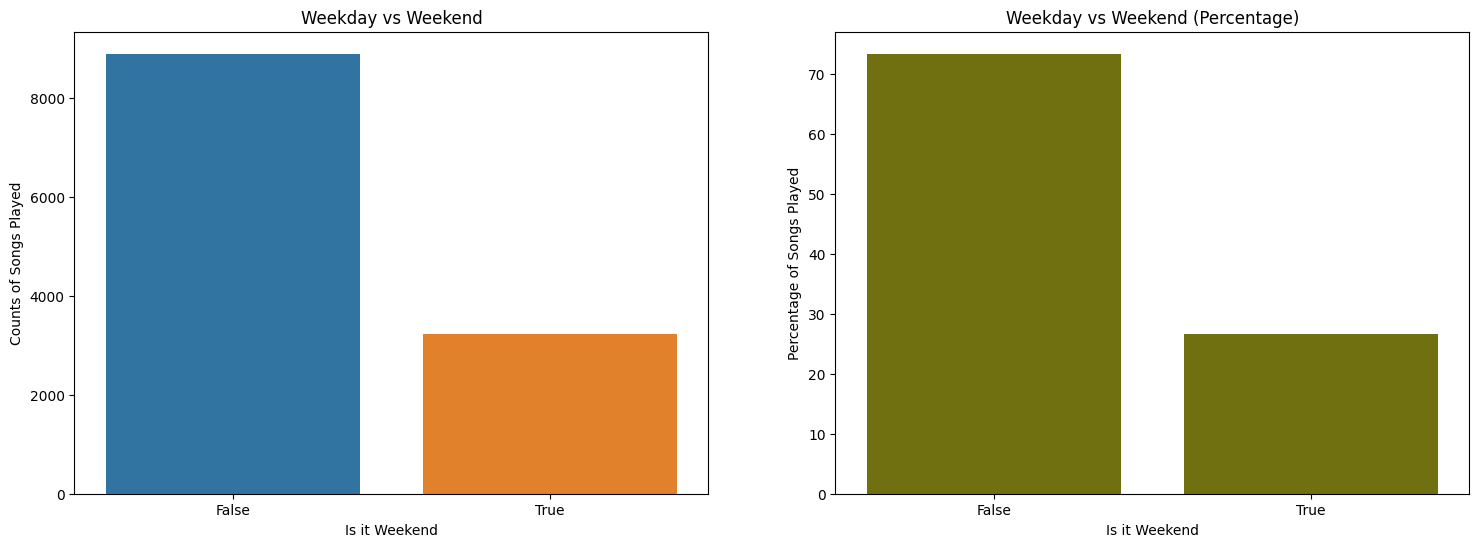

In [47]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(18,6))
ax1 = sns.barplot(x=["False","True"],y="Count",data=weekday_vs_weekend,ax=ax1)
ax1.set(title="Weekday vs Weekend",xlabel="Is it Weekend",ylabel="Counts of Songs Played");

ax2 = sns.barplot(x=["False","True"],y="Percentage",data=weekday_vs_weekend,color="Olive",ax=ax2)
ax2.set(title="Weekday vs Weekend (Percentage)",xlabel="Is it Weekend",ylabel="Percentage of Songs Played");